# **DATA** **PREPROCESSING**

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/spotify_dataset.csv')

# Check for missing values
print(data.isnull().sum())
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Convert necessary columns to appropriate data types
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], errors='coerce')
data['track_album_release_date'].fillna(data['track_album_release_date'].median(), inplace=True)

# Convert categorical columns to category type
categorical_cols = ['track_artist', 'playlist_name', 'playlist_genre', 'playlist_subgenre']
for col in categorical_cols:
    data[col] = data[col].astype('category')

# Feature Scaling
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])


track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


<ipython-input-3-dea00d4cc74e>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['track_album_release_date'].fillna(data['track_album_release_date'].median(), inplace=True)


# **Exploratory Data Analysis (EDA) and Visualizations**

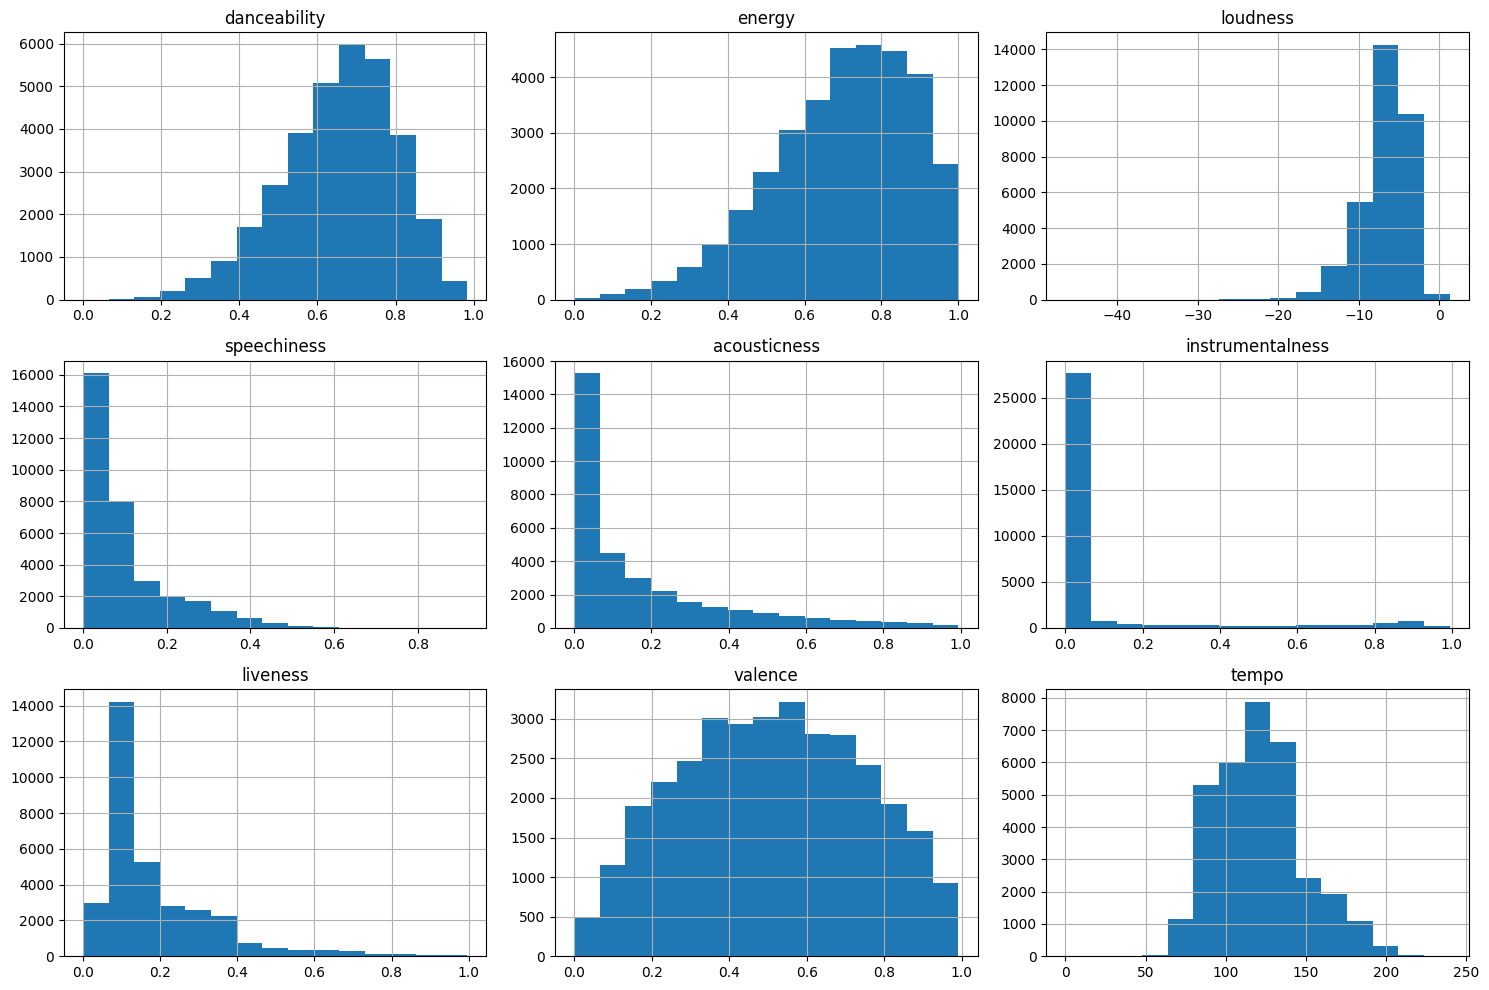

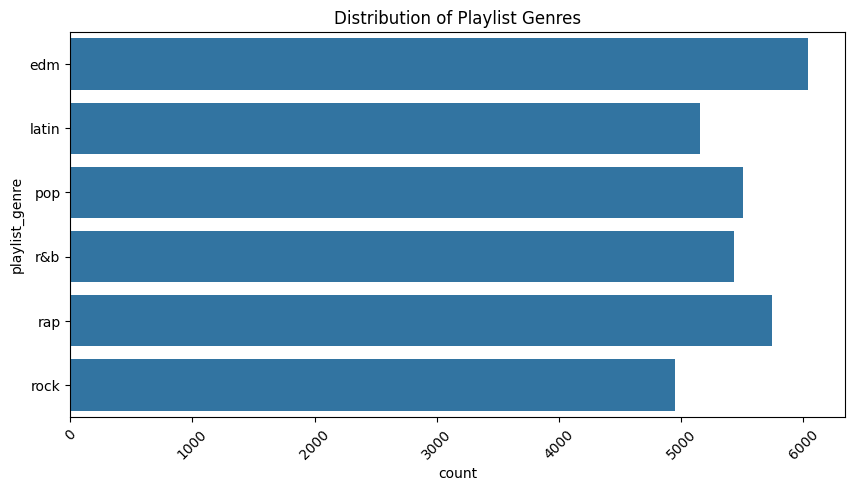

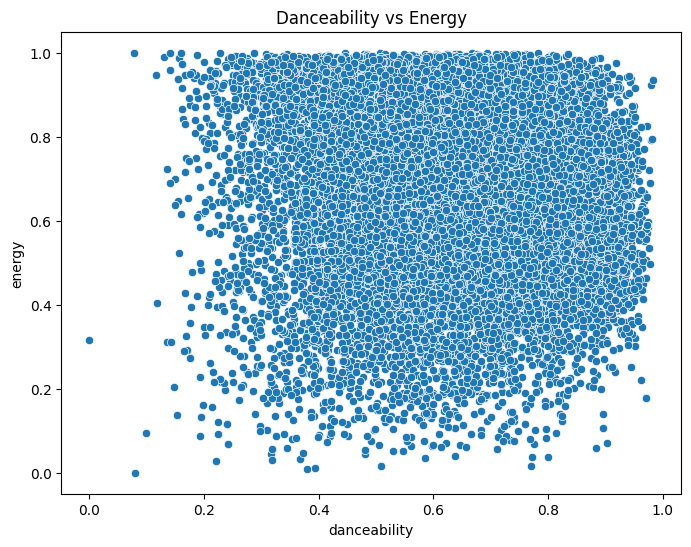

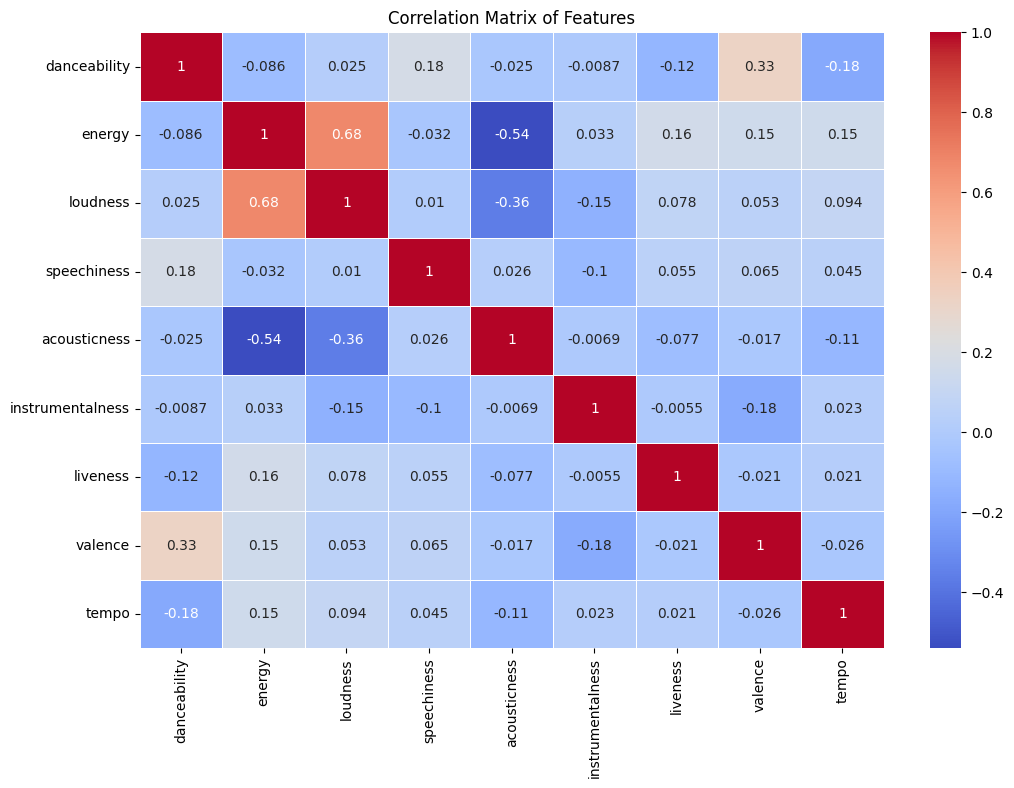

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
data[features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Distribution of playlist genres
plt.figure(figsize=(10, 5))
sns.countplot(data['playlist_genre'])
plt.title('Distribution of Playlist Genres')
plt.xticks(rotation=45)
plt.show()

# Scatterplot of danceability vs energy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='energy', data=data)
plt.title('Danceability vs Energy')
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


# **Clustering**

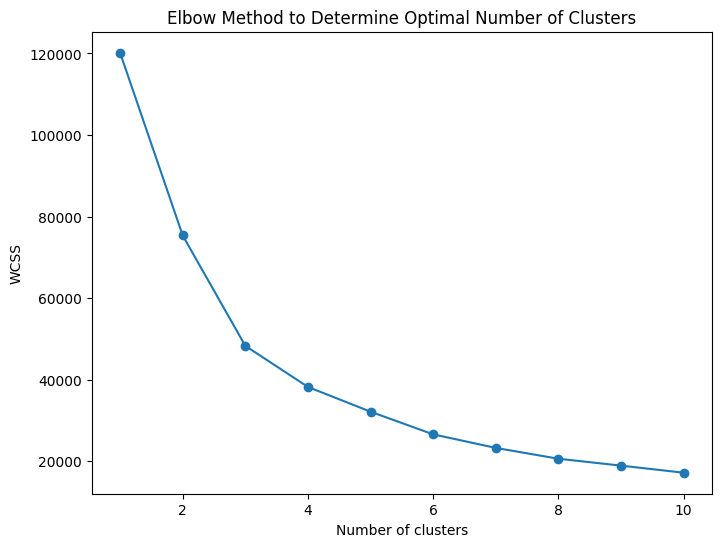

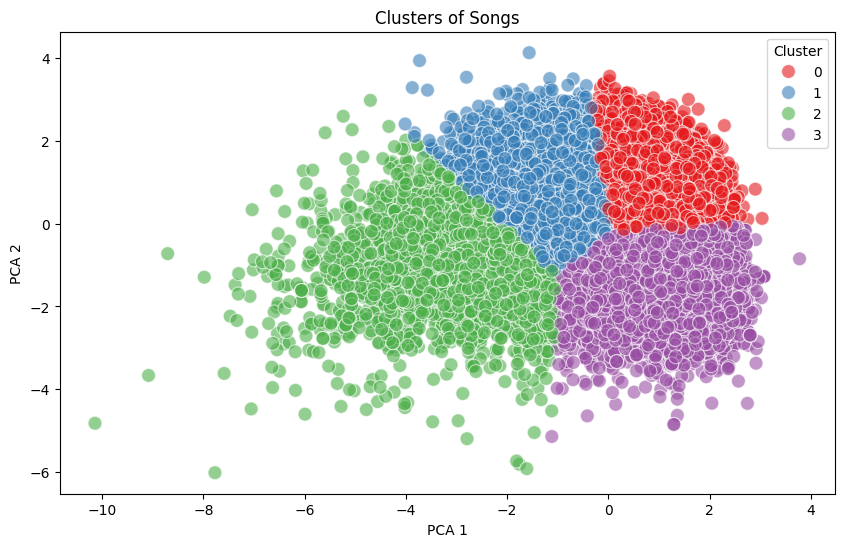

In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

# Fitting KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_pca)
data['Cluster'] = clusters

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster'], palette='Set1', s=100, alpha=0.6)
plt.title('Clusters of Songs')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


# **Model Building for Recommendation System**

In [9]:
# Assign songs to clusters based on similarity
def recommend_songs(song_name, data, n_recommendations=5):
    song_data = data[data['track_name'] == song_name]
    if song_data.empty:
        return f"Song '{song_name}' not found in the dataset."

    cluster = song_data['Cluster'].values[0]
    similar_songs = data[data['Cluster'] == cluster].sample(n=n_recommendations)
    return similar_songs[['track_name', 'track_artist', 'playlist_genre']]

# Example Recommendation
song_name = "I Don't Care (with Justin Bieber)"
recommendations = recommend_songs(song_name, data)
print(recommendations)


                                              track_name   track_artist  \
10857                                         Death Note           GNAR   
4816                              Sit Still, Look Pretty           Daya   
18995                                              Saoco          Wisin   
6842   Stay Fly (feat. Young Buck, Eightball & MJG) -...  Three 6 Mafia   
26876  Moving Mountains (feat. Ollie Green) - GATTÜSO...    Disco Fries   

      playlist_genre  
10857            rap  
4816             pop  
18995          latin  
6842             rap  
26876            edm  
